In [88]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras



import seaborn as sns
import random
import matplotlib.pyplot as plt

from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.shape

(50000, 2)

In [11]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# テキストをベクトル化（TF-IDF）

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

NGRAM_RANGE = (1, 2)
TOP_K = 20000         # 上位2000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

def ngram_vectorize(texts, labels):
    
    # Parameters パラメーター
    kwargs = {
        'ngram_range' : NGRAM_RANGE,
        'dtype' : 'int32',
        'strip_accents' : 'unicode',
        'decode_error' : 'replace',
        'analyzer' : TOKEN_MODE,
        'min_df' : MIN_DOC_FREQ,
    }
    
    # Vectrization ベクトル化
    tfidf_vectorizer = TfidfVectorizer(**kwargs)
    transformed_texts = tfidf_vectorizer.fit_transform(texts)
    
    # Select best k features, with feature importance measured by f_classif
    #　f_classif を用いて上位2000 を選ぶ。
     
    
    selector = SelectKBest(f_classif, k=min(TOP_K, transformed_texts.shape[1]))
    selector.fit(transformed_texts, labels)
    
    transformed_texts = selector.transform(transformed_texts).astype('float32')
    return transformed_texts
# Vectorize the data
vect_df = ngram_vectorize(df['review'], df['sentiment'])

/Users/daisuke/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1798: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


In [16]:
vect_df.shape

(50000, 20000)

In [18]:
tfidf = TfidfVectorizer()

tr_texts = tfidf.fit_transform(df['review'])
tr_texts.shape

(50000, 101895)

In [20]:
from sklearn.model_selection import train_test_split

# Split data to target (y) and features (X)
X = vect_df.toarray()
y = (np.array(df['sentiment']))

# Here we split data to training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(X_train.shape, X_test.shape))

Train dataset shape: (25000, 20000), 
Test dataset shape: (25000, 20000)


In [86]:
y_train.shape

(25000,)

In [21]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

In [87]:
X_train.shape

(25000, 20000)

# Modeling

In [26]:
input_shape = X_train.shape[1:]

In [84]:
model = tf.keras.Sequential()





model.add(tf.keras.layers.Dense(1000,input_shape=input_shape, activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=300,activation='relu'))

model.add(tf.keras.layers.Dense(units=50,activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.summary()




Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1000)              20001000  
_________________________________________________________________
dropout_20 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               300300    
_________________________________________________________________
dense_58 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 51        
Total params: 20,316,401
Trainable params: 20,316,401
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), 
                    verbose=1, batch_size=128)

Epoch 1/10
196/196 [==============================] - 22s 114ms/step - loss: 0.2605 - accuracy: 0.8940 - val_loss: 0.1921 - val_accuracy: 0.9253
Epoch 2/10
196/196 [==============================] - 22s 111ms/step - loss: 0.0871 - accuracy: 0.9691 - val_loss: 0.2415 - val_accuracy: 0.9092
Epoch 3/10
196/196 [==============================] - 22s 111ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.3623 - val_accuracy: 0.9058
Epoch 4/10
196/196 [==============================] - 22s 113ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.4308 - val_accuracy: 0.9099
Epoch 5/10
196/196 [==============================] - 24s 123ms/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.5039 - val_accuracy: 0.9107
Epoch 6/10
196/196 [==============================] - 22s 114ms/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.5370 - val_accuracy: 0.9059
Epoch 7/10
196/196 [==============================] - 23s 118ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.5277 - val_ac

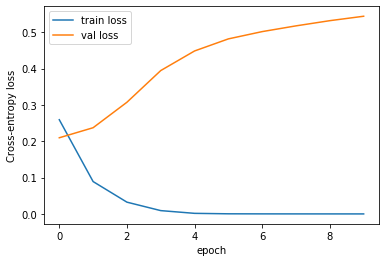

In [44]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")

plt.legend()

In [22]:
X_train.shape[1:]

(20000,)

In [2]:
pip install tensorflow-datasets

     |████████████████████████████████| 3.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 177 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 44 kB 5.8 MB/s eta 0:00:011
     |████████████████████████████████| 100 kB 10.1 MB/s ta 0:00:01
  Created wheel for dill: filename=dill-0.3.2-py3-none-any.whl size=78911 sha256=ba9cc38cf691bda063cd08b54edbe149b77afe8e0daa20ed426cf915bfcdcbfe
  Stored in directory: /Users/daisuke/Library/Caches/pip/wheels/02/49/cf/660924cd9bc5fcddc3a0246fe39800c83028d3ccea244de352
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=d11b099cd90df839090c270f0902e52c9836a7cc474c6ea0636b8e2e30944560
  Stored in directory: /Users/daisuke/Library/Caches/pip/wheels/59/9a/1d/3f1afbbb5122d0410547bf9eb50955f4a7a98e53a6d8b99bd1
Successfully built dill promise
ERROR: tensorflow-metadata 0.24.0 has requirement absl-py<0.11,>=0.9, but you'll have absl-py 0.8.0 which is incompatible.
You should consider upgradin